In [210]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [211]:
df = pd.read_csv('train.csv')

In [212]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [214]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [215]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [216]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [217]:
df = df.drop('id', 1)

In [218]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


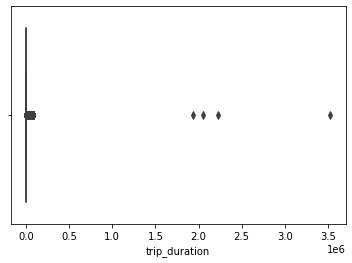

In [219]:
sns.boxplot(df['trip_duration'])
plt.show()

In [220]:
df['trip_duration'].sort_values( ascending=False).head(10)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64

In [221]:
df['trip_duration'].sort_values( ascending=True).head(20)

207497     1
1382872    1
1360664    1
346102     1
1034341    1
1439166    1
35196      1
918415     1
767271     1
810851     1
600247     1
1165514    1
533799     1
596136     1
311745     1
555237     1
404610     1
761666     1
1063496    1
1056854    1
Name: trip_duration, dtype: int64

In [222]:
df.loc[df['trip_duration'].between(120,1075) , 'trip_duration'].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1])

0.00     120.0
0.10     236.0
0.25     350.0
0.50     532.0
0.75     750.0
0.80     803.0
0.85     861.0
0.90     924.0
0.95     995.0
0.97    1026.0
0.99    1059.0
1.00    1075.0
Name: trip_duration, dtype: float64

In [223]:
#df.loc[np.abs(df['trip_duration'] - df['trip_duration'].mean()) <= (3*df['trip_duration'].std()), 'trip_duration'].sort_values()

In [224]:
len(df.loc[df['trip_duration'].between(120,1075),  'trip_duration'])

1066336

In [225]:
df = df.loc[df['trip_duration'].between(120,1075)]

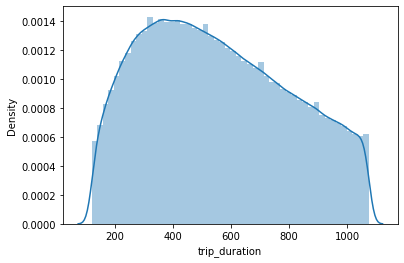

In [226]:
sns.distplot(df['trip_duration'])
plt.show()

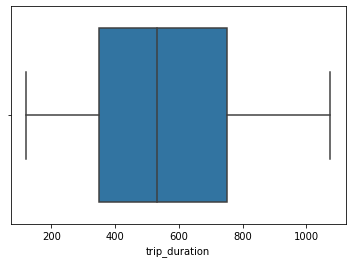

In [227]:
sns.boxplot(df['trip_duration'])
plt.show()

In [228]:
df['vendor_id'].unique()

array([2, 1], dtype=int64)

In [229]:
df['vendor_id'].value_counts()

2    569408
1    496928
Name: vendor_id, dtype: int64

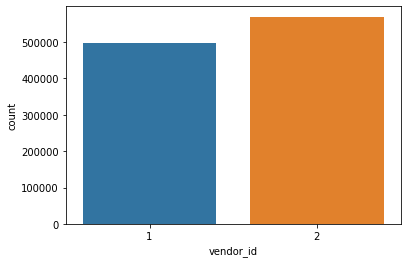

In [230]:
sns.countplot(df['vendor_id'])
plt.show()

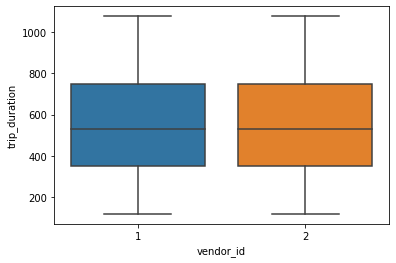

In [231]:
sns.boxplot(x='vendor_id', y='trip_duration', data=df)
plt.show()

In [232]:
df['vendor_id'] = df['vendor_id'].map({1:0, 2:1})

In [233]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443


In [234]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [235]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443


In [236]:
df['pickup_datetime'].dt.month.value_counts()

3    189753
4    181803
2    179716
5    175914
1    173951
6    165199
Name: pickup_datetime, dtype: int64

In [237]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1


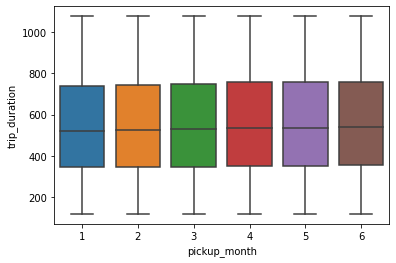

In [238]:
sns.boxplot(x=df['pickup_month'], y=df['trip_duration'])
plt.show()

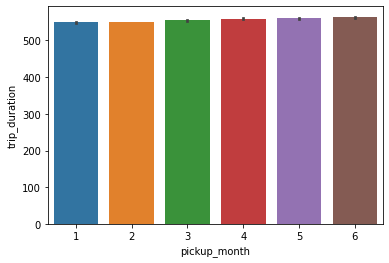

In [239]:
sns.barplot(x='pickup_month', y='trip_duration', data=df)
plt.show()

In [240]:
df['pickup_datetime'].dt.dayofweek

0          0
1          6
3          2
4          5
5          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1066336, dtype: int64

In [241]:
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,5


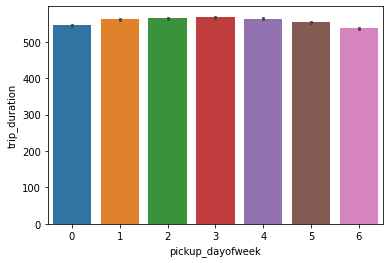

In [242]:
sns.barplot(x=df['pickup_dayofweek'], y=df['trip_duration'])
plt.show()

In [243]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_hour
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,17
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,19
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,13
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,5,22


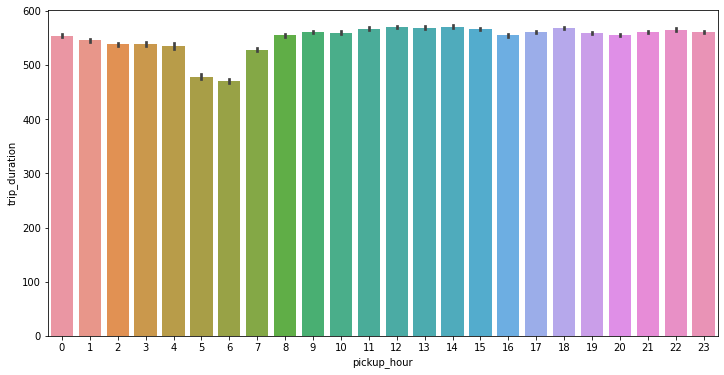

In [244]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['pickup_hour'], y=df['trip_duration'])
plt.show()

In [245]:
df['pickup_slot'] = np.select(
                            [df['pickup_hour'].between(0,4), 
                            df['pickup_hour'].between(5,7), 
                            df['pickup_hour'].between(8,11), 
                            df['pickup_hour'].between(12,15), 
                            df['pickup_hour'].between(16,18), 
                            df['pickup_hour'].between(19,21), 
                            df['pickup_hour'].between(22,23)], 
                            ['Late_Night','Early_Morning','Morning','Noon','Evening','Night','Midnight',]
)
                            
                            

In [246]:
df = df.drop('pickup_hour', axis=1)

In [247]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,Late_Night
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,Noon
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,5,Midnight


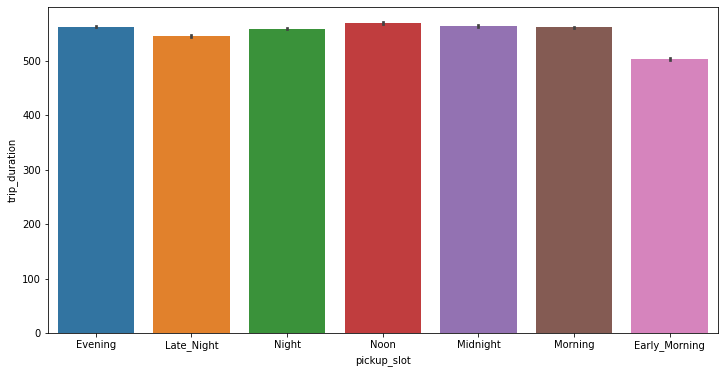

In [248]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['pickup_slot'], y=df['trip_duration'])
plt.show()

In [249]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,Late_Night
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,Noon
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,5,Midnight


In [250]:
def timeFeatures(df):
    df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
    df['dropoff_month'] = df['dropoff_datetime'].dt.month
    df['dropoff_dayofweek'] = df['dropoff_datetime'].dt.dayofweek
    df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
    df['dropoff_slot'] = np.select(
                            [df['dropoff_hour'].between(0,4), 
                            df['dropoff_hour'].between(5,7), 
                            df['dropoff_hour'].between(8,11), 
                            df['dropoff_hour'].between(12,15), 
                            df['dropoff_hour'].between(16,18), 
                            df['dropoff_hour'].between(19,21), 
                            df['dropoff_hour'].between(22,23)], 
                            ['Late_Night','Early_Morning','Morning','Noon','Evening','Night','Midnight',]
)
    return df

In [251]:
df = timeFeatures(df)

In [252]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_slot,dropoff_month,dropoff_dayofweek,dropoff_hour,dropoff_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,Evening,3,0,17,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,Late_Night,6,6,0,Late_Night
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,Night,4,2,19,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,Noon,3,5,13,Noon
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,5,Midnight,1,5,22,Midnight


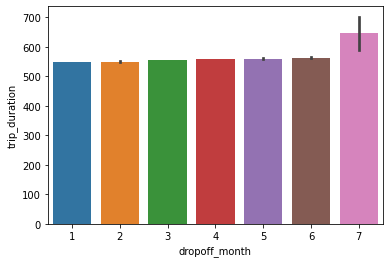

In [253]:
sns.barplot(x='dropoff_month', y='trip_duration', data=df)
plt.show()

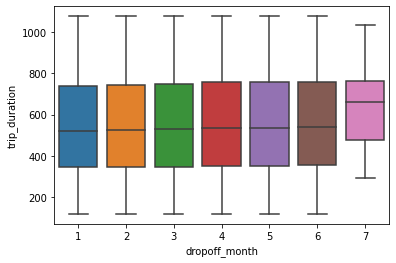

In [254]:
sns.boxplot(x='dropoff_month', y='trip_duration', data=df)
plt.show()

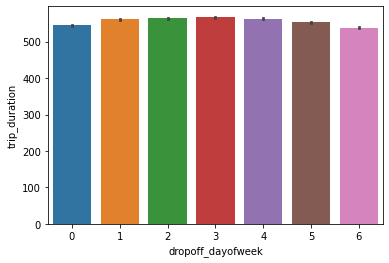

In [255]:
sns.barplot(x=df['dropoff_dayofweek'], y=df['trip_duration'])
plt.show()

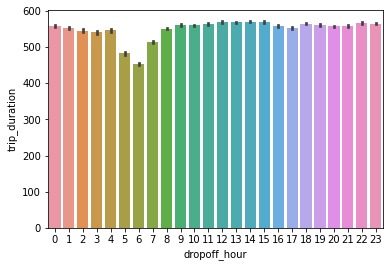

In [256]:
sns.barplot(x=df['dropoff_hour'], y=df['trip_duration'])
plt.show()

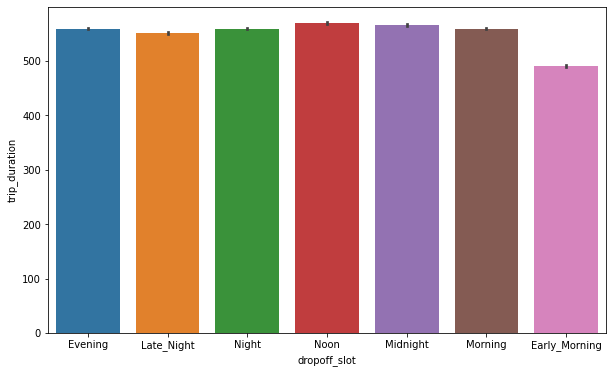

In [257]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['dropoff_slot'], y=df['trip_duration'])
plt.show()

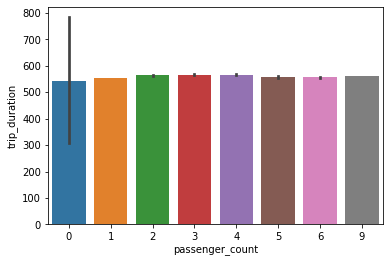

In [258]:
sns.barplot(x=df['passenger_count'], y=df['trip_duration'])
plt.show()

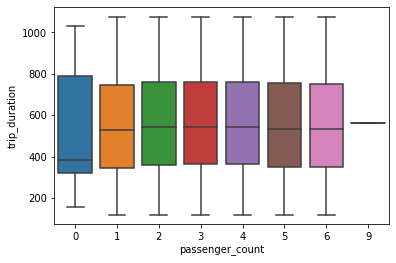

In [259]:
sns.boxplot(x=df['passenger_count'], y=df['trip_duration'])
plt.show()

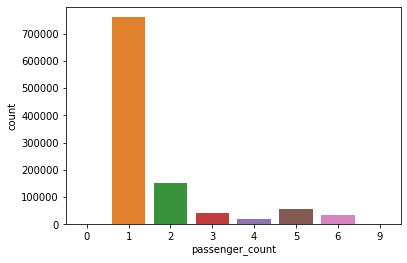

In [260]:
sns.countplot(df['passenger_count'])
plt.show()

In [261]:
df['passenger_count'].value_counts()

1    760041
2    150652
5     56880
3     43139
6     35433
4     20183
0         7
9         1
Name: passenger_count, dtype: int64

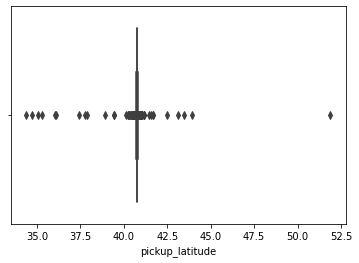

In [262]:
sns.boxplot(df['pickup_latitude'])
plt.show()

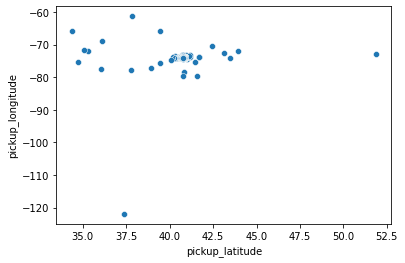

In [263]:
sns.scatterplot(x=df['pickup_latitude'], y=df['pickup_longitude'])
plt.show()

In [264]:
df['pickup_latitude'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10    40.723709
0.25    40.739250
0.50    40.754719
0.75    40.768085
0.90    40.781006
Name: pickup_latitude, dtype: float64

In [265]:
df = df[(df['pickup_latitude']<45) & (df['pickup_longitude']<90)]

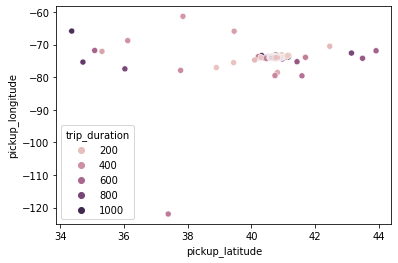

In [266]:
sns.scatterplot(x=df['pickup_latitude'], y=df['pickup_longitude'], hue=df['trip_duration'])
plt.show()

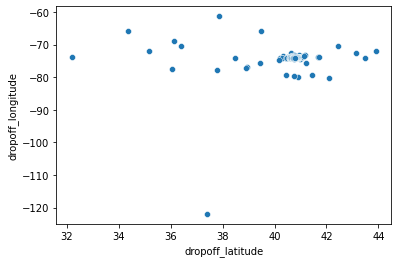

In [267]:
sns.scatterplot(x=df['dropoff_latitude'], y=df['dropoff_longitude'])
plt.show()

In [269]:
df = df[df['dropoff_longitude']>-80]

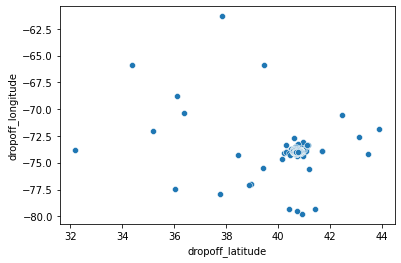

In [270]:
sns.scatterplot(x=df['dropoff_latitude'], y=df['dropoff_longitude'])
plt.show()

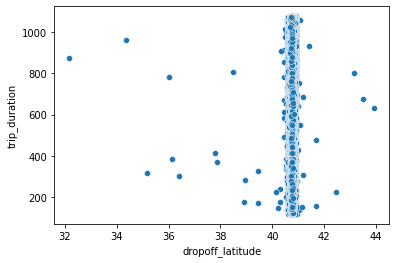

In [271]:
sns.scatterplot(x=df['dropoff_latitude'], y=df['trip_duration'])
plt.show()

In [272]:
df['store_and_fwd_flag'].nunique()

2

In [273]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['']

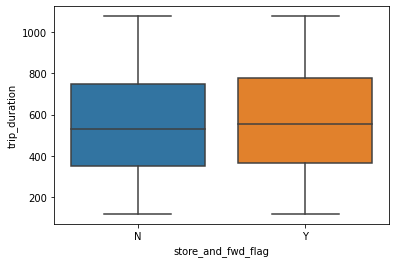

In [274]:
sns.boxplot(x=df['store_and_fwd_flag'], y=df['trip_duration'])
plt.show()

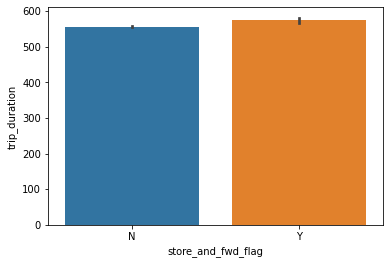

In [275]:
sns.barplot(x=df['store_and_fwd_flag'], y=df['trip_duration'])
plt.show()

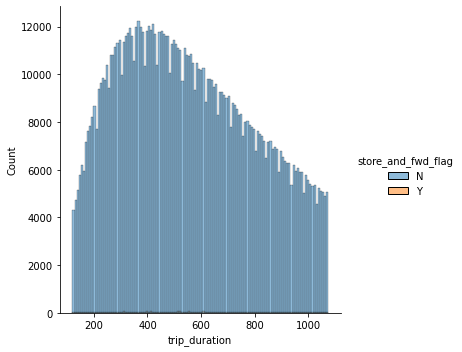

In [283]:
sns.displot(x=df['trip_duration'], hue=df['store_and_fwd_flag'])
plt.show()

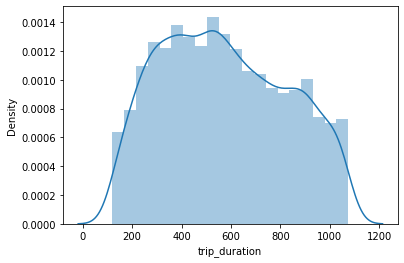

In [284]:
sns.distplot(df.loc[df['store_and_fwd_flag'] == 'Y', 'trip_duration'])
plt.show()

In [285]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_slot,dropoff_month,dropoff_dayofweek,dropoff_hour,dropoff_slot
0,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,Evening,3,0,17,Evening
1,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,Late_Night,6,6,0,Late_Night
3,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,Night,4,2,19,Night
4,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,Noon,3,5,13,Noon
5,1,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,5,Midnight,1,5,22,Midnight


In [286]:
df = df.drop(['pickup_datetime', 'dropoff_datetime'], axis=1)

In [287]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_slot,dropoff_month,dropoff_dayofweek,dropoff_hour,dropoff_slot
0,1,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,Evening,3,0,17,Evening
1,0,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,Late_Night,6,6,0,Late_Night
3,1,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,Night,4,2,19,Night
4,1,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,Noon,3,5,13,Noon
5,1,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,5,Midnight,1,5,22,Midnight


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066333 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1066333 non-null  int64  
 1   passenger_count     1066333 non-null  int64  
 2   pickup_longitude    1066333 non-null  float64
 3   pickup_latitude     1066333 non-null  float64
 4   dropoff_longitude   1066333 non-null  float64
 5   dropoff_latitude    1066333 non-null  float64
 6   store_and_fwd_flag  1066333 non-null  object 
 7   trip_duration       1066333 non-null  int64  
 8   pickup_month        1066333 non-null  int64  
 9   pickup_dayofweek    1066333 non-null  int64  
 10  pickup_slot         1066333 non-null  object 
 11  dropoff_month       1066333 non-null  int64  
 12  dropoff_dayofweek   1066333 non-null  int64  
 13  dropoff_hour        1066333 non-null  int64  
 14  dropoff_slot        1066333 non-null  object 
dtypes: float64(4), 

In [2]:
from math import radians, cos, sin, asin, sqrt


In [3]:
def distance_fn(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [ ]:
df['distance'] = distance_fn()

In [288]:
df.to_csv('train_EDA.csv', index=False)